In [52]:
#shape dosyası okuma

In [1]:
import geopandas as gpd

In [54]:
fp = "C:/Users/Bilal Benzer/Documents/GitHub/Python_Calismalarim-Python_Works_vscode/GIS/geopython/geopython2021/L2/DAMSELFISH_distributions.shp"

In [55]:
data = gpd.read_file(fp)        #shape dosyası okuma

In [56]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [57]:
data.head()      #verileri tablo olarak okuma

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


In [58]:
#ayrıca verileri bir harita üzerinde de görebiliriz
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

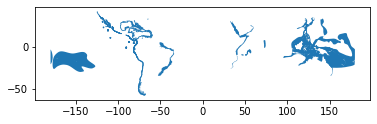

In [59]:
data.plot()

In [60]:
#shape dosyasına veri yazmak da mümkün

In [61]:
#önce bir shp oluşturalım
out_file_path = r"C:\Users\Bilal Benzer\Documents\GitHub\Python_Calismalarim-Python_Works_vscode\GIS\geopython\geopython2021\L2\new_shp"

In [62]:
#50 satırı alalım sadece (0'dan 50'ye kadar)

In [63]:
selection = data[0:50]

In [64]:
selection.to_file(out_file_path) # shape dosyasına bu şekilde yazıyoruz.

In [65]:
#geopandalarda geometriler

In [66]:
#veri kaynağını tamamen alabileceğimiz gibi, istenilen kolonları da alabiliriz

In [67]:
data["geometry"].head() #bu kod ile "geometry" kolonunu alabiliyoruz

0    POLYGON ((-115.64375 29.71392, -115.61585 29.6...
1    POLYGON ((-105.58995 21.89340, -105.56483 21.8...
2    POLYGON ((-111.15962 19.01536, -111.15948 18.9...
3    POLYGON ((-80.86500 -0.77894, -80.75930 -0.833...
4    POLYGON ((-67.33922 -55.67610, -67.33755 -55.6...
Name: geometry, dtype: geometry

In [68]:
#bu veriler shape olarak depolandığı için shapely modülündeki her şeyi burada da kullanabiliriz
#ilk 5 çokgenin isimlerini alalım

In [69]:
selection = data[0:5]

In [70]:
#geopandalarda belirli bir işlevi kullanarak seçili satırları yineleyebilir ve her çokgen için alanı yazdırabiliriz

In [71]:
for index,row in selection.iterrows():
    poly_area = row["geometry"].area
    print("çokgenin alanı",poly_area)
#geopandas, pandas ın modülüdür.bu yüzden pandası çağırmadan pandaların tüm işlevlerini kullanabiliriz

çokgenin alanı 19.39625403004423
çokgenin alanı 6.145902112999523
çokgenin alanı 2.6972072716440176
çokgenin alanı 87.46062072709621
çokgenin alanı 0.0009183696153124292


In [72]:
#şimdi geodataframelerimize alanları tek tek çokgenleri hesaplayıp depoladığımız yeni bir sütun oluşturalım. 

In [73]:
data = data.to_crs(epsg=4326) #shp dosyasında koordinat tanımı yoksa eğer, koordinat tanımlaması yapmamız gerekir
data["area"] = data.area
data["area"].head(2)
#çokgenlerin alanları aşağıya yazılacak

C:\Anaconda3\envs\geopython\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


0    19.396254
1     6.145902
Name: area, dtype: float64

In [74]:
#ilk çokgenlerin alanlarını çekmiş olduk.minimum ve maksimum değerleri de görebiliriz

In [75]:
max_area = data["area"].max() 

In [76]:
mean_area = data["area"].mean()

In [77]:
print(max_area,mean_area)

1493.2009183643906 19.958433617208513
